# Read PDF to TXT

Author lds217


# PDF to PNG

In [67]:
from pdf2image import convert_from_path

images = convert_from_path('data/a.pdf', poppler_path = r"D:\Dat\Github\OCR\bin\poppler-24.07.0\Library\bin")

for i in range(len(images)):
    images[i].save('data/converted/page'+ str(i) +'.jpg', 'JPEG')

# Clean PNG

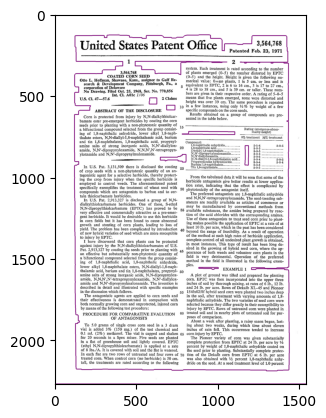

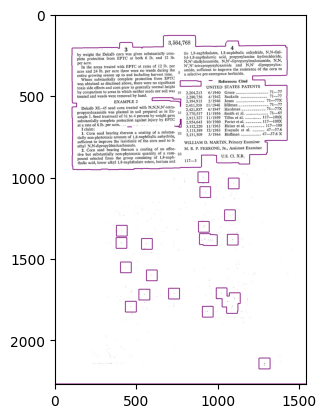

In [7]:
# Color drawings are acceptable in US patent applications, but not in international applications (see PCT Rule 11.13).
# https://github.com/pankajr141/experiments/blob/master/Reasoning/ComputerVision/opencv%20tricks%20-%20segmenting%20pdf%20contents.ipynb
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
a = 0
folder_path = 'data/converted'
for index, filename in enumerate(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)

    img_ = 255 - img      # Reversing scales of RGB image
    img_[img_ < 128] = 0   # Removing pixel with low brightness


    # Remove Lines from our image
    kernel = np.ones((2, 2), np.uint8)
    img_erosion = cv2.erode(img_, kernel, iterations=1)

    # grouping Elements which are near
    kernel = np.ones((9, 9), np.uint8)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=8)

    gray = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(img, contours, -1, (127, 12, 123), 3)
    cv2.imwrite('data/convertedprocess/page'+ str(a) +'.jpg', img)
    a+=1
    plt.figure()
    plt.imshow(img)


plt.show()

# Read text with tesseract

In [8]:
import os
from PIL import Image
import pytesseract

all_text = ""
folder_path = 'data/convertedprocess'
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    text = pytesseract.image_to_string(Image.open(image_path))
    all_text += f"Text from {filename}:\n{text}\n\n"

output_file = 'output_tesseract_without_pre.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(all_text)

# same result withou pre-processing


# Chat GPT

In [10]:
with open("output_tesseract.txt", "r", encoding='utf-8-sig') as f:
    string = f.read()
string

'Text from page0.jpg:\nUnited States Patent Office\n\n3,564,768\nPatented Feb. 23, 1971\n\ni\n\n3,564,768\nCOATED CORN SEED\nOtto L. Hoffman, Shawnee, Kans,, assignor to Gulf Re-\nsearch & Development Company, Pittsburgh, Pa., a\ncorporation of Delaware 5\nNo Drawing. Filed Oct. 25, 1968, Ser. No. 770,856\nInt. Cl. AOke 1/06 .\nUS. Cl. 47—57.6 2 Claims\n\n10\nABSTRACT OF THE DISCLOSURE\n\nCorn is protected from injury by N,N-dialkylthiolcar-\nbamate ester pre-emergent herbicides by coating the corn\nseeds prior to planting with a non-phytotoxic quantity of\na bifunctional compound selected from the group consist-\ning of 1,8-naphthalic anhydride, lower alkyl 1,8-naph-\nthalate esters, N,N-diallyl-1,8-naphthalamic acid, barium\nand tin 1,8-naphthalates, 1,8-naphthalic acid, propynyl-\namine salts of strong inorganic acids, N,N’-diallylox-\namide, N,N’-dipropynyloxamide, N,N,N’,N’-tetrapropyn-\nyloxamide and N,N’-dipropynylmalonamide.\n\n16\n\n20\n\nIn U.S. Pat. 3,131,509 there is disclo

In [11]:
from openai import OpenAI
import os

key = os.getenv("OPEN_AI_KEY")
client = OpenAI(
    api_key=key,
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": "can you help my summarize this document in technical term?" + prompt}]
    )
    return response.choices[0].message.content.strip()

print(chat_gpt(string))

The document describes a method for protecting corn plants from injury caused by N,N-dialkylthiolcarbamate ester pre-emergent herbicides by coating the corn seeds with a non-phytotoxic quantity of specific bifunctional compounds. The effectiveness of these compounds is demonstrated through a comparative evaluation test procedure. The preferred antagonists are 1,8-naphthalic anhydride and N,N,N’-tetrapropynyloxamide. Application of these compounds on corn seeds prior to planting allows for the safe use of EPTC herbicide at high rates, resulting in improved crop protection and yield. Examples are provided to illustrate the successful application of the method in the field. The document also includes patent information and references to relevant patents.


In [6]:
import deepdoctection as dd
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import pandas as pd

[0922 23:25.55 @dd.py:464]  INF  Config: 
 {'DEVICE': device(type='cpu'),
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS': {'COMBINATIONS': None, 'PRIORITY': None, 'THRESHOLDS': None},
 'LIB': 'PT',
 'OCR': {'CONFIG': {'TESSERACT': 'dd/conf_tesseract.yaml'},
         'USE_DOCTR': False,
         'USE_TESSERACT': True,
         'USE_TEXTRACT': False,
         'WEIGHTS': {'DOCTR_RECOGNITION': {'PT': 'doctr/crnn_vgg16_bn/pt/crnn_vgg16_bn-9762b0b0.pt',
                                           'TF': 'doctr/crnn_vgg16_bn/tf/crnn_vgg16_bn-76b7f2c6.zip'},
                     'DOCTR_WORD': {'PT': 'doctr/db_resnet50/pt/db_resnet50-ac60cadc.pt',
                                    'TF': 'doctr/db_resnet50/tf/db_resnet50-adcafc63.zip'}}},
 'PDF_MINER': {'X_TOLERANCE': 3, 'Y_TOLERANCE': 3},
 'PT': {'CELL': {'FILTER': None,
                 'WEIGHTS': 'cell/d2_model_1849999_cell_inf_only.pt',
                 'WEIGHTS_TS': 'cell/d2_model_1849999_cell_inf_only.ts'},
        'ITEM': {'FILTER': None,
       

,0,1,2,3,4,5,6
0,,,,,,,
1,,,,,,,
2,Blind,,,,"34.5%, n=1",,"1199 sec, n=1"
3,Low Vision,,,,98.3% n=2,,"1716 sec, n=3"
4,,,,,"(97.7%, n=3)",,"(1934 sec, n=2)"


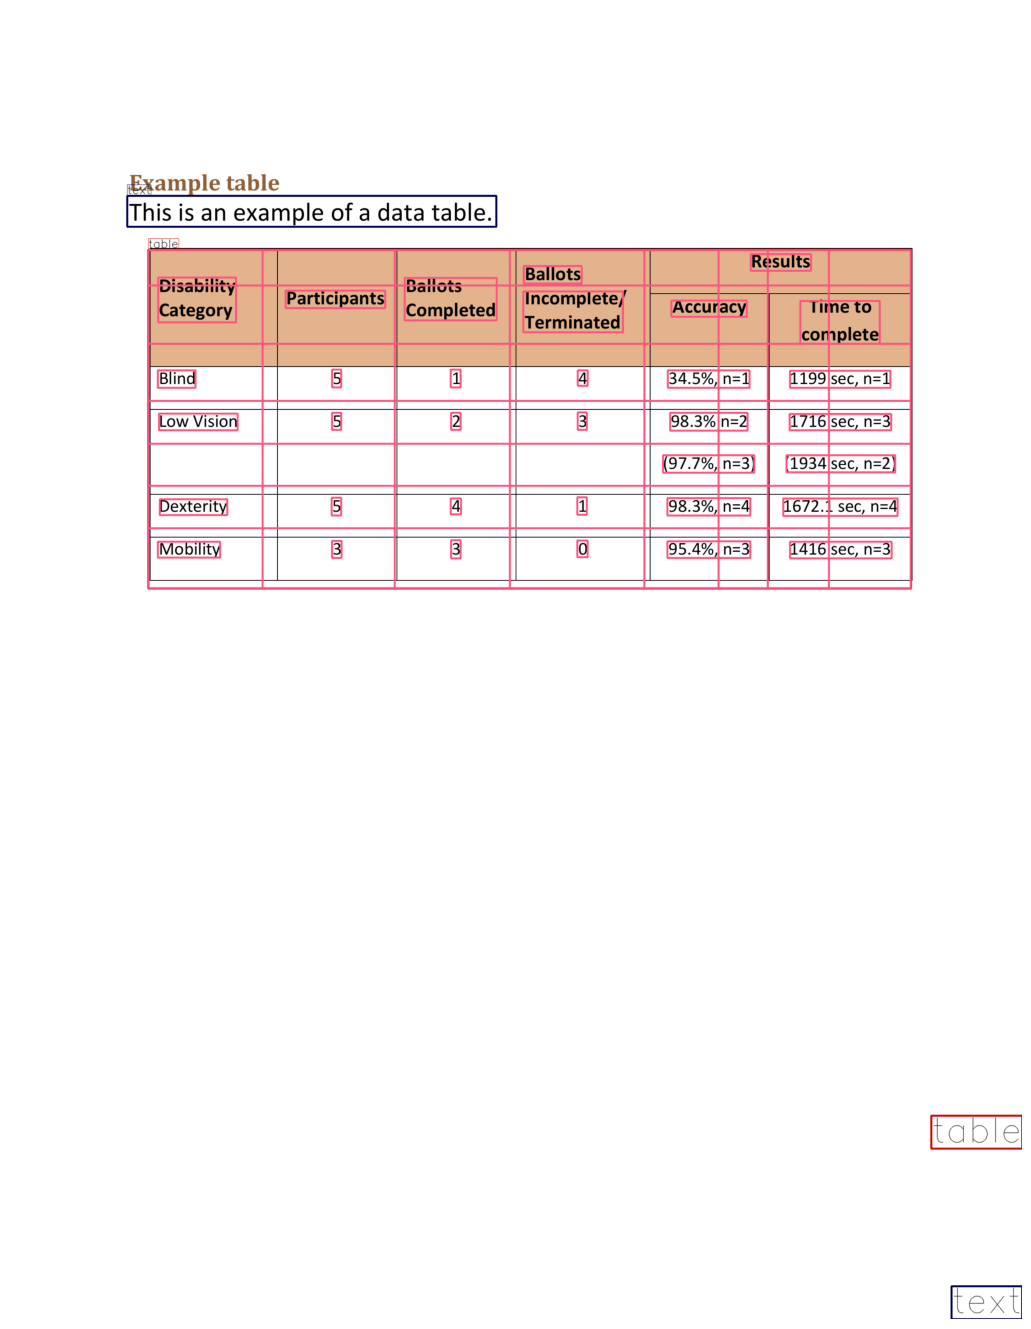

In [24]:
path ="data/table.pdf"
analyzer = dd.get_dd_analyzer()
df = analyzer.analyze(path=path)
df.reset_state()
doc=iter(df)

page = next(doc)

image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

table = page.tables[0]
df = pd.DataFrame(table.csv)
df.head()

In [22]:
df.head(100)

,0,1,2,3,4,5,6,7
0,,#1,,,,,,Ht 7
1,,(comparative,,,,,,(comparative
2,Example,example),,,,,,example)
3,,,,,,,,
4,,,,,,,,
5,,,,,,,,
6,,,,,,,,
7,,,,,,,,


2024-09-22T23:26:38 - INFO - Processing page-1
[0922 23:26.38 @lattice.py:407]  INF  Processing page-1
C:\Users\Owner\AppData\Local\Temp\ipykernel_6488\1706051519.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='text').show()
C:\Users\Owner\AppData\Local\Temp\ipykernel_6488\1706051519.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='grid').show()
C:\Users\Owner\AppData\Local\Temp\ipykernel_6488\1706051519.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  camelot.plot(tables[0], kind='joint').show()


,0,1,2,3,4,5
0,Disability \nCategory,Participants,Ballots \nCompleted,Ballots \nIncomplete/ \nTerminated,Results,
1,,,,,Accuracy,Time to \ncomplete
2,Blind,5,1,4,"34.5%, n=1","1199 sec, n=1"
3,Low Vision,5,2,3,"98.3% n=2 \n(97.7%, n=3)","1716 sec, n=3 \n(1934 sec, n=2)"
4,Dexterity,5,4,1,"98.3%, n=4","1672.1 sec, n=4"
5,Mobility,3,3,0,"95.4%, n=3","1416 sec, n=3"


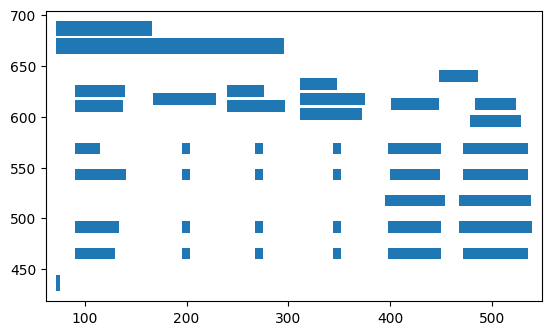

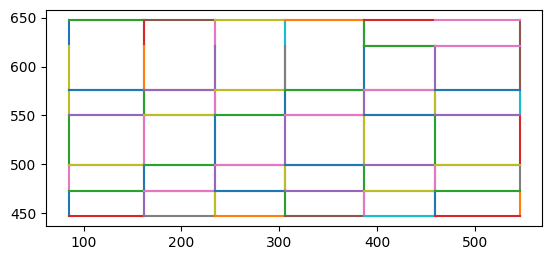

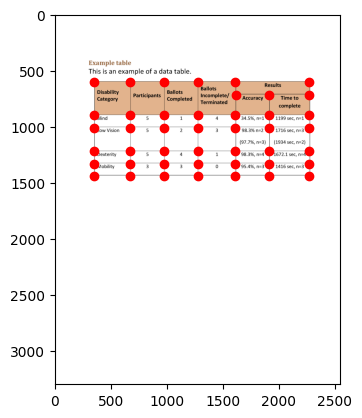

In [25]:
import camelot
tables = camelot.read_pdf('data/table.pdf',pages="1") #lattice, stream, stream, json, text,


df = tables[0].df

#tables[0].to_csv('c.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
 # get a pandas DataFrame!
camelot.plot(tables[0], kind='text').show()
camelot.plot(tables[0], kind='grid').show()
camelot.plot(tables[0], kind='joint').show()
df.head(10)

In [28]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header

In [29]:
df.head()

,Speed (mph),Driver,Car,Engine\nDate,
1,407.447,Craig Breedlove,Spirit of America,GE J47\n8/5/63,
2,413.199,Tom Green,Wingfoot Express,WE J46 \n10/2/64,
3,434.22,Art Arfons,Green Monster,GE J79 \n10/5/64,
4,468.719,Craig Breedlove,Spirit of America,GE J79 \n10/13/64,
5,526.277,Craig Breedlove,Spirit of America,GE J79 \n10/15/65,


In [30]:
df[['Engine', 'Date']] = df['Engine\nDate'].str.split("\n", n=1, expand=True)

C:\Users\Owner\AppData\Local\Temp\ipykernel_28936\3968258336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Engine', 'Date']] = df['Engine\nDate'].str.split("\n", n=1, expand=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_28936\3968258336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Engine', 'Date']] = df['Engine\nDate'].str.split("\n", n=1, expand=True)


In [31]:
df.head()

,Speed (mph),Driver,Car,Engine\nDate,,Engine,Date
1,407.447,Craig Breedlove,Spirit of America,GE J47\n8/5/63,,GE J47,8/5/63
2,413.199,Tom Green,Wingfoot Express,WE J46 \n10/2/64,,WE J46,10/2/64
3,434.22,Art Arfons,Green Monster,GE J79 \n10/5/64,,GE J79,10/5/64
4,468.719,Craig Breedlove,Spirit of America,GE J79 \n10/13/64,,GE J79,10/13/64
5,526.277,Craig Breedlove,Spirit of America,GE J79 \n10/15/65,,GE J79,10/15/65


In [54]:
tables = camelot.read_pdf('data/d.pdf',pages='0,1') #lattice, stream, stream, json, text,


df = tables[0].df

#tables[0].to_csv('c.csv') # to_json, to_excel, to_html, to_markdown, to_sqlite
 # get a pandas DataFrame!
camelot.plot(tables[0], kind='text').show()
df.head()

2024-09-22T17:17:15 - INFO - Processing page-0
[0922 17:17.15 @lattice.py:407]  INF  Processing page-0
c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\camelot\parsers\lattice.py:411: UserWarning: page-0 is image-based, camelot only works on text-based pages.
  warnings.warn(
2024-09-22T17:17:15 - INFO - Processing page-1
[0922 17:17.15 @lattice.py:407]  INF  Processing page-1


c:\Users\Owner\AppData\Local\Programs\Python\Python312\Lib\site-packages\camelot\parsers\lattice.py:411: UserWarning: page-1 is image-based, camelot only works on text-based pages.
  warnings.warn(


IndexError: list index out of range

In [3]:
import ctypes
from ctypes.util import find_library
find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

In [5]:
%pip install Ghostscript

Note: you may need to restart the kernel to use updated packages.


^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install decimer

Note: you may need to restart the kernel to use updated packages.


In [5]:
import decimer

# Path to your chemical structure image
image_path = "data/convertedprocess/page0.jpg"

# Predict the SMILES string
smiles = predict_SMILES(image_path)

print("Predicted SMILES:", smiles)

ModuleNotFoundError: No module named 'decimer'